In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('drinks.csv')
df.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [77]:
df.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [78]:
print(df.index)
print(df.index.dtype)
print(df.shape)

RangeIndex(start=0, stop=193, step=1)
int64
(193, 6)


In [79]:
print(df['beer_servings'])
print("Mean:", df['beer_servings'].mean())


0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64
Mean: 106.16062176165804


In [80]:
print(df['continent'].value_counts())

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64


In [81]:
df.loc[(df['continent'] == 'EU') & (df['wine_servings'] > 300)]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [82]:
df = pd.read_csv('ufo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [83]:
df.mode()

,City,Colors Reported,Shape Reported,State,Time
0,Seattle,RED,LIGHT,CA,11/16/1999 19:00


In [84]:
df.loc[df['State'] == 'VA'].mode(dropna=True)['City']

0    Virginia Beach
1               NaN
2               NaN
Name: City, dtype: object

In [85]:
for col in df.columns:
    col = col.replace(" ", "_")
print(df.columns)

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')


In [86]:
df=pd.read_csv('u.user' , sep='|')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [87]:
df['occupation'].nunique()

21

In [88]:
df.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [89]:
df.dropna()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [90]:
df = pd.read_csv('drinks.csv')

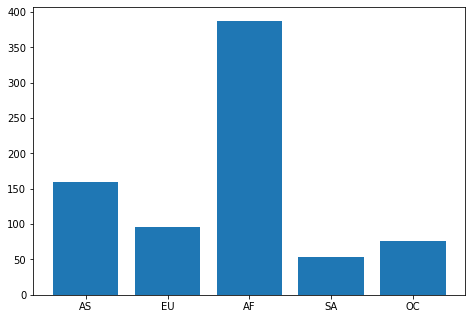

In [117]:
#bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
continents = df['continent'].dropna().unique().tolist()
consumption = df.dropna().groupby(['continent']).sum()['total_litres_of_pure_alcohol'].tolist()
ax.bar(continents,consumption)
plt.show()

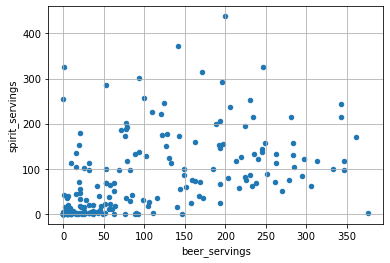

In [121]:
df.plot(kind ="scatter",
          x ='beer_servings',
          y ='spirit_servings')
plt.grid()

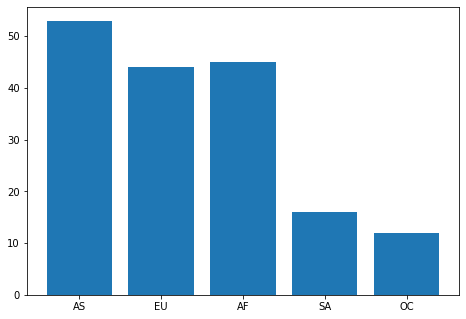

In [126]:
#bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
continents = df['continent'].dropna().unique().tolist()
consumption = df.dropna().groupby(['continent']).count()['country']
ax.bar(continents,consumption)
plt.show()